# *Practice Project 1: Movie Lens*
***

In [1]:
#system specific
import os
import sys
assert sys.version_info >= (3,5)

#import the libraries
import pandas as pd
import numpy as np
import random
#visualizations 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#consistent size plots
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 12

#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

#view all the columns in the dataset in the notebook
pd.options.display.max_columns = None

## *Load the data*

In [2]:
#load the movie dataset
movies = pd.read_table('movies.dat',delimiter='::',engine='python',header=None,usecols=[0,1,2],
                      names=['MovieID','Title','Genre'])

In [3]:
movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#load the ratings dataset
ratings = pd.read_table('ratings.dat',engine='python',names=['UserID','MovieID','Rating','Timestamp'],
                       delimiter='::')

In [5]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
#load the user.dat file
users = pd.read_table('users.dat',delimiter='::',names=['UserID','Gender','Age','Occupation','Zip-code'],
                     engine='python')

In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## *Objective and scope of the project*
***
Domain: Entertainment

Analysis Tasks to be performed:

Import the three datasets
Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
User Age Distribution
User rating of the movie “Toy Story”
Top 25 movies by viewership rating
Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Feature Engineering:
            Use column genres:

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings

## *Basic understanding of the three datasets*

In [8]:
#check movies info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genre    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


There are no null values in this dataset. The total number of observations are 3882. 

In [9]:
#check if all the movieId is unique
len(movies['MovieID'].unique())

3883

In [10]:
#check info of the ratings dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


There are no null values in this dataset as well. Lets check the unique movie ID in this dataset

In [11]:
len(ratings['MovieID'].unique())

3706

Here for the same movie id there are ratings by different users and hence the total number of unique movie id is lesser. 

In [12]:
#check the info of the users dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


There are no null values in this dataset as well. 

In [13]:
#check the number of unique users
len(users['UserID'].unique())

6040

At first glance, looks like the same user is not repeated in this dataset. 

## *Merge the datasets to form the master_data dataframe*
***

In [14]:
#merge movies and ratings based on MovieID
master_data_1 = movies.merge(ratings,on='MovieID',suffixes=('_movies','_ratings'))

In [15]:
#check shape of the merged dataset
master_data_1.shape

(1000209, 6)

In [16]:
master_data_1.columns

Index(['MovieID', 'Title', 'Genre', 'UserID', 'Rating', 'Timestamp'], dtype='object')

In [17]:
#create the final master_data dataframe 
master_data = master_data_1.merge(users,on='UserID',suffixes=('_md1','_users'))

In [18]:
master_data.shape

(1000209, 10)

In [19]:
master_data.columns

Index(['MovieID', 'Title', 'Genre', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [20]:
#check few rows of the master_data
master_data.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [21]:
#check info
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genre       1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


The master_data contains non null rows. There are over 1 million rows in this dataset. Next step would be to explore for any duplicates in the dataset and do visual exploration of the data. The movies dataset was prepared by hand and hence there could be potential errors. 

## *Exploratory Data Analysis and Data Cleaning*
***

In [22]:
#number of unique movie titles
len(master_data['MovieID'].unique())

3706

In [23]:
len(master_data['Title'].unique())

3706

The number of unique movies IDs and unique movie titles match. 

### *Movie titles which received the maximum number of reviews*

In [24]:
#add a new column for the count
master_data['Count'] = 1

In [25]:
#top movie Id's in terms of the number of user reviews
pd.pivot_table(master_data,values='Count',index='Title',aggfunc='sum').sort_values(by='Count',ascending=False)[:20]

,Count
Title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
Saving Private Ryan (1998),2653
Terminator 2: Judgment Day (1991),2649
"Matrix, The (1999)",2590
Back to the Future (1985),2583


In [26]:
#explore the top movie with movie ID 2858
master_data[master_data['MovieID']==2858]['Title'][:1]

103    American Beauty (1999)
Name: Title, dtype: object

American Beauty (1999) received the maximum number of user reviews. 

In [27]:
#plot the top movies in terms of the reviews
max_reviews = pd.pivot_table(master_data,values='Count',index='Title',aggfunc='sum').sort_values(by='Count',ascending=False)[:20]

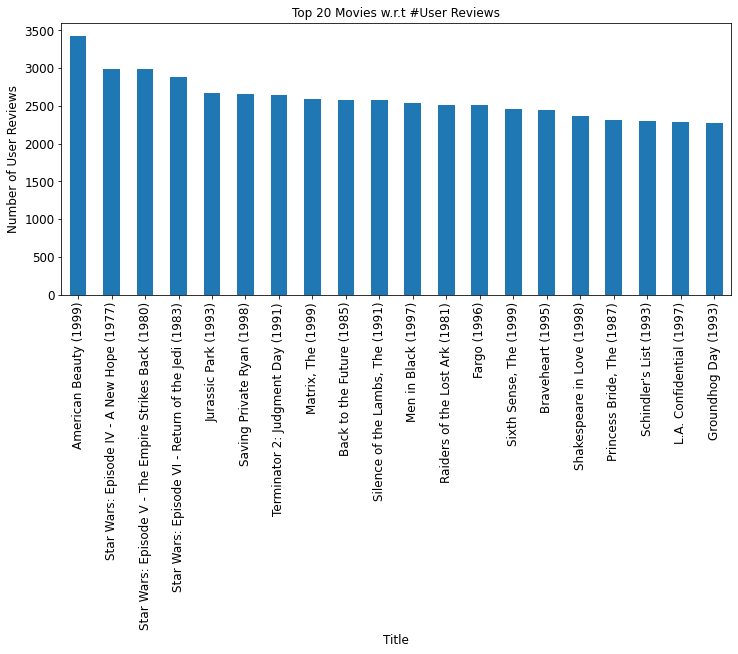

In [28]:
max_reviews['Count'].plot(kind='bar')
plt.title('Top 20 Movies w.r.t #User Reviews')
plt.ylabel('Number of User Reviews')
plt.grid(False)
plt.show()

Observation: 
American Beauty has the maximum number of user reviews. 
All the Star Wars Episodes are also the maximum. This is one of the most popular movies of its time. We can clearly see that some of the hit movies of their time have received the maximum number of reviews. The reverse can also be true where people rate some of the highy anticipated movies which turn out to be bad when they are released. 

In [29]:
#movie titles with the least amount of user reviews
min_reviews = pd.pivot_table(master_data,values='Count',index='Title',aggfunc='sum').sort_values(by='Count',ascending=False)[-20:]

In [30]:
min_reviews[:5]

,Count
Title,
Beauty (1998),1
Telling You (1998),1
"Fantastic Night, The (La Nuit Fantastique) (1949)",1
Condition Red (1995),1
Broken Vessels (1998),1


The lowest number of reviews is 1 and that too for many movie titles. We still cannot ascertain whether this is correlated with the average user rating of these titles. But it would be unfair to compare these movies with the others which received a large number of reviews. 

In [31]:
#create a pivot table with all the user reviews
num_reviews = pd.pivot_table(master_data,values='Count',index='Title',aggfunc='sum')

In [32]:
#check the basic stats of the number of reviews
num_reviews.describe()

,Count
count,3706.000000
mean,269.889099
std,384.047838
min,1.000000
25%,33.000000
50%,123.500000
75%,350.000000
max,3428.000000


The average number of reviews is 269 and the median is 123.  For analysing the factors that influence the movie ratings, only those movies should be considered which received a reasonable number of user reviews. Else, the analysis would be biased. 

In [33]:
master_data.head(3)

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Count
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,1
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,1
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,1


In [34]:
#top users with respect to their number of reviews
master_data.groupby('UserID')['Count'].apply(sum).sort_values(ascending=False)[:10]

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: Count, dtype: int64

In [35]:
#number of unique titles on which the user with max reviews
len(master_data[master_data['UserID']==4169]['Title'].unique())

2314

Atleast this top user rated all unique titles as it matches with the number of reviews she gave.  

In [36]:
#check for exact duplicates in the master data
master_data[master_data.duplicated()==True]

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Count


There are no duplicates in the master data

### *Split the Genres in separate columns*

In [37]:
#determine the ax number of Genre's tagged for a movie title
num_genre = []
for i in range(len(master_data)):
    num_genre.append(len(master_data['Genre'][i]))
print('Maximum Number of Genre in a movie title = %d'%(max(num_genre)))

Maximum Number of Genre in a movie title = 47


In [38]:
#dataframe conatining the different genres
df_genre = master_data['Genre'].str.split('|',n=max(num_genre),expand=True)

In [39]:
df_genre.head()

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Animation,Children's,Musical,Romance,None,None
2,Drama,None,None,None,None,None
3,Action,Adventure,Fantasy,Sci-Fi,None,None
4,Drama,War,None,None,None,None


In [40]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1000209 non-null  object
 1   1       689510 non-null   object
 2   2       304986 non-null   object
 3   3       93496 non-null    object
 4   4       13383 non-null    object
 5   5       231 non-null      object
dtypes: object(6)
memory usage: 53.4+ MB


There are only 231 rows where a particular movie has 5 genres. It may not be worth to keep this last genre in the dataset. Looks like these movies were completely confused with what Genre they can be categorized into. 

In [41]:
#Add the Genres as separate column into the master dataframe
master_data['Genre_1'] = df_genre[0]
master_data['Genre_2'] = df_genre[1]
master_data['Genre_3'] = df_genre[2]

In [42]:
master_data.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Count,Genre_1,Genre_2,Genre_3
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,1,Animation,Children's,Comedy
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,1,Animation,Children's,Musical
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,1,Drama,None,None
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,1,Action,Adventure,Fantasy
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,1,Drama,War,None


In [43]:
#check the Genre of the movies sorted in descending order
master_data['Genre_1'].value_counts().sort_values(ascending=False)

Comedy         276923
Action         257457
Drama          208627
Horror          44170
Adventure       43630
Crime           37849
Animation       36936
Children's      21491
Thriller        17851
Sci-Fi          11464
Mystery         10237
Film-Noir        9343
Musical          7112
Documentary      6817
Western          5689
Romance          2832
War               991
Fantasy           790
Name: Genre_1, dtype: int64

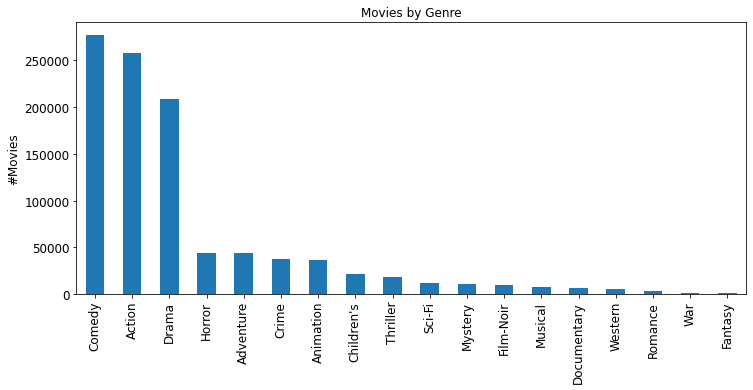

In [44]:
#check the first Genre of the movies sorted in descending order
master_data['Genre_1'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Movies by Genre')
plt.ylabel('#Movies')
plt.show()

Comedy, Action and Drama are the top 3 first genre and contributes to 70% of the all the ratings. 

In [45]:
#check based on all the top 3 genres
movies_genre = master_data.groupby(['Genre_1','Genre_2','Genre_3']).size().unstack().fillna(0)

In [46]:
movies_genre.head(3)

Genre_3             Animation  Children's   Comedy   Crime   Drama  Fantasy  \
Genre_1 Genre_2                                                               
Action  Adventure      1098.0       956.0  14630.0  3509.0  5196.0   8200.0   
        Animation         0.0       231.0      0.0     0.0     0.0      0.0   
        Children's        0.0         0.0      0.0     0.0     0.0    973.0   

Genre_3             Film-Noir  Horror  Musical  Mystery  Romance   Sci-Fi  \
Genre_1 Genre_2                                                             
Action  Adventure         0.0  2939.0      0.0   2471.0   6559.0  27182.0   
        Animation         0.0     0.0      0.0      0.0      0.0      0.0   
        Children's        0.0     0.0      0.0      0.0      0.0      0.0   

Genre_3             Thriller    War  Western  
Genre_1 Genre_2                               
Action  Adventure     6349.0  370.0    418.0  
        Animation        0.0    0.0      0.0  
        Children's       0.0    0.0      0.0

<Figure size 1584x504 with 0 Axes>

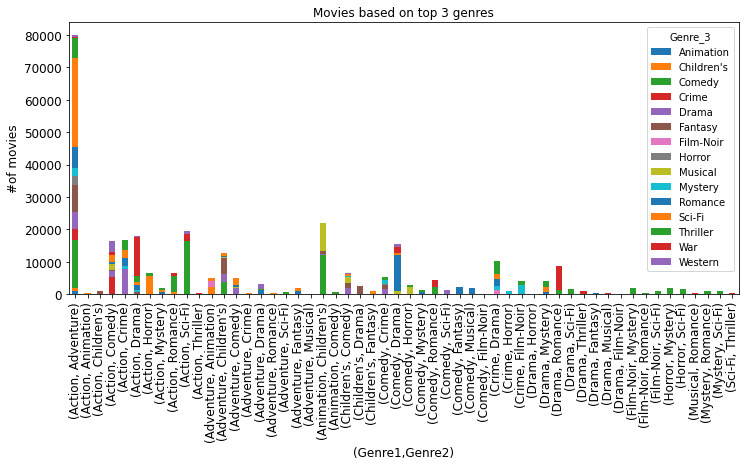

In [47]:
#plot based on Genre_1 and Genre_2 grouped
plt.figure(figsize=(22,7))
movies_genre.plot(kind='bar',stacked=True)
plt.title('Movies based on top 3 genres')
plt.ylabel('#of movies')
plt.xlabel('(Genre1,Genre2)')
plt.show()

Action, Adventure is the top based on Genre 1 and Genre 2. 

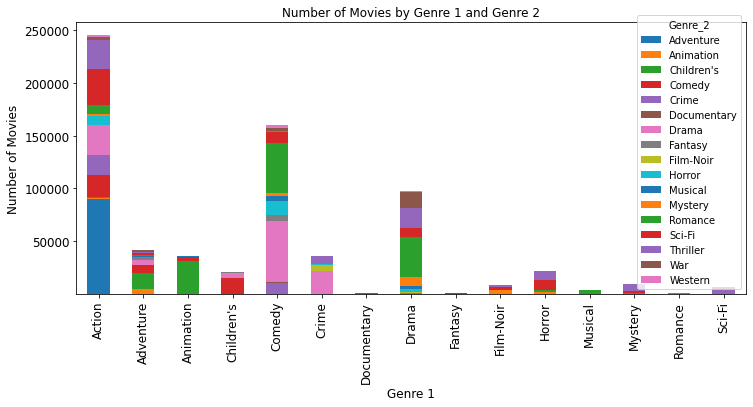

In [48]:
#group by Genre_1 and Genre_2
master_data.groupby(['Genre_1','Genre_2']).size().unstack().fillna(0).plot(kind='bar',stacked=True,legend=True)
plt.title('Number of Movies by Genre 1 and Genre 2')
plt.ylabel('Number of Movies')
plt.xlabel('Genre 1')
plt.show()

In [49]:
#check the info of the master data
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genre       1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
 10  Count       1000209 non-null  int64 
 11  Genre_1     1000209 non-null  object
 12  Genre_2     689510 non-null   object
 13  Genre_3     304986 non-null   object
dtypes: int64(7), object(7)
memory usage: 114.5+ MB


Genre_2 and Genre_3 have null values. Genre_2 has only 30% of null values while Genre_3 has close to 70% of null values. It would be better to retain only Genre_1 and Genre_2 and drop the Genre_3. The amount of information loss would not be much as (Action,Adventure) is retained when we grouped based on the Genres. 

In [50]:
#drop Genre_3
master_data.drop('Genre_3',axis=1,inplace=True)

In [51]:
master_data.columns

Index(['MovieID', 'Title', 'Genre', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Count', 'Genre_1', 'Genre_2'],
      dtype='object')

We can full the null values in Genre_2 with the corresponding values in Genre_1. 

In [52]:
#drop the redundant Genre column
master_data.drop('Genre',axis=1,inplace=True)

In [53]:
master_data.head(3)

,MovieID,Title,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Count,Genre_1,Genre_2
0,1,Toy Story (1995),1,5,978824268,F,1,10,48067,1,Animation,Children's
1,48,Pocahontas (1995),1,5,978824351,F,1,10,48067,1,Animation,Children's
2,150,Apollo 13 (1995),1,5,978301777,F,1,10,48067,1,Drama,None


### *Replace the None in Genre_2 with the corresponding values in Genre_1*

In [54]:
#this is much faster than the same logic in a if statement ... 
master_data['Genre_2'] = master_data.apply(lambda row: row['Genre_1'] if row['Genre_2']==None else row['Genre_2'],axis=1)

In [55]:
master_data.head()

,MovieID,Title,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Count,Genre_1,Genre_2
0,1,Toy Story (1995),1,5,978824268,F,1,10,48067,1,Animation,Children's
1,48,Pocahontas (1995),1,5,978824351,F,1,10,48067,1,Animation,Children's
2,150,Apollo 13 (1995),1,5,978301777,F,1,10,48067,1,Drama,Drama
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,978300760,F,1,10,48067,1,Action,Adventure
4,527,Schindler's List (1993),1,5,978824195,F,1,10,48067,1,Drama,War


In [56]:
#check the frequency of Genre_2 in the dataset
master_data['Genre_2'].value_counts().sort_values(ascending=False)

Drama          228561
Comedy         164492
Romance        103267
Thriller        97034
Adventure       92034
Sci-Fi          74418
Horror          48426
Children's      47421
Crime           32236
War             25553
Mystery         20408
Musical         13163
Action          12311
Western         10838
Fantasy         10486
Documentary      7358
Film-Noir        6485
Animation        5718
Name: Genre_2, dtype: int64

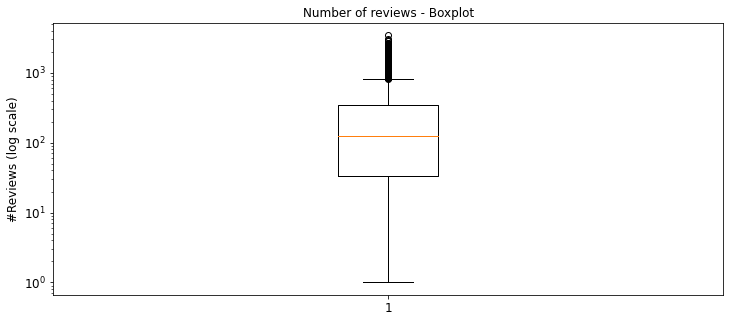

In [59]:
plt.boxplot(num_reviews['Count'])
plt.yscale('log')
plt.title('Number of reviews - Boxplot')
plt.ylabel('#Reviews (log scale)')
plt.show()

There are a lot of outliers when it comes to the number of reviews for a particular movie title. 

### *Save the master_data as a separate csv file for further analysis in a new notebook*

In [61]:
master_data.to_csv('master.csv',index=False)